In [1]:
# 1) design model (input size, output size, forward pass)
# 2) construct loss and optimizer
# 3) training loop
#    - forward pass: compute predicgtion
#    - backward pass: gradients
#    - update weights
import torch
import torch.nn as nn # 用来获取网络模型
import numpy as np # 用来进行数据转换
from sklearn import datasets # 生成数据库
import matplotlib.pyplot as plt

In [2]:
# 0) prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 1)

X = torch.from_numpy(X_numpy.astype(np.float32)) # X.shape = torch.Size([100, 1])
y = torch.from_numpy(y_numpy.astype(np.float32)) # y.shape = torch.Size([100])
y = y.view(y.shape[0], 1) # 行向量转成列向量

n_samples, n_features = X.shape

In [3]:
# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [4]:
# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [5]:
# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    
    # zero grad
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0:
        print(f"epoch: {epoch + 1}, loss = {loss.item():.4f}")

epoch: 10, loss = 4346.4927
epoch: 20, loss = 3244.7576
epoch: 30, loss = 2447.2480
epoch: 40, loss = 1869.3600
epoch: 50, loss = 1450.2117
epoch: 60, loss = 1145.9302
epoch: 70, loss = 924.8554
epoch: 80, loss = 764.1136
epoch: 90, loss = 647.1589
epoch: 100, loss = 562.0092


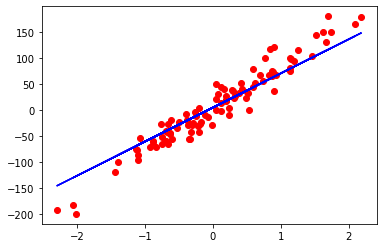

In [6]:
# plot
# 在把 tensor 转换成 numpy 之前需要先把 requires_grad 设置回 False
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()